In [35]:
import scipy.stats as st
import pandas as pd
import numpy as np

# 比如我们需要计算2017-01-03的因子IC值 （与收益相关）
# 默认全部A股分析basic_earnings_per_share
# 1、2017-01-03的因子暴露值
# 2、2017-01-04的股票收益率
  # 1月4号的收盘价-1月3号的收盘价/1月3号的收盘价
# 3、计算相关性系数

In [2]:
# 1、2017-01-03的因子暴露值
q = query(fundamentals.income_statement.basic_earnings_per_share)

# 获取的是横截面数据
fund = get_fundamentals(q, entry_date="2017-01-03")[:, 0, :]

In [20]:
fund

,basic_earnings_per_share
001979.XSHE,0.71
002826.XSHE,0.25
002827.XSHE,0.58
601155.XSHG,0.44
300498.XSHE,2.0759
300585.XSHE,0.31
603058.XSHG,0.1773
300577.XSHE,1.28
000166.XSHE,0.19
603996.XSHG,0.2029


In [5]:
# 2、2017-01-04的股票收益   1月4号的收盘价-1月3号的收盘价/1月3号的收盘价
# 每个股票都有一个价格收益计算
price_now = get_price(list(fund.index), start_date="2017-01-03", end_date="2017-01-03", fields='close').T

In [9]:
# 获取1月4号
price_next = get_price(list(fund.index), start_date="2017-01-04", end_date="2017-01-04", fields='close').T

In [12]:
# 3、计算收益率
stock_rice = (price_next.iloc[:, 0] - price_now.iloc[:, 0]) / price_now.iloc[:, 0]

In [95]:
stock_rice

001979.XSHE    0.006611
002826.XSHE   -0.015489
002827.XSHE   -0.015444
601155.XSHG    0.014310
300498.XSHE    0.013260
300585.XSHE    0.100116
603058.XSHG    0.099751
300577.XSHE    0.100086
000166.XSHE    0.000000
603996.XSHG    0.017274
603393.XSHG    0.007976
600996.XSHG   -0.015481
300568.XSHE    0.050662
300576.XSHE    0.100004
300581.XSHE    0.100036
300571.XSHE    0.100061
601020.XSHG    0.034674
601375.XSHG    0.100682
603823.XSHG    0.099972
603218.XSHG    0.099955
603928.XSHG   -0.013480
300567.XSHE    0.029195
300566.XSHE    0.008702
002837.XSHE    0.100124
300575.XSHE   -0.025873
300408.XSHE    0.010052
603298.XSHG    0.099960
603577.XSHG    0.099873
603990.XSHG    0.003440
002831.XSHE   -0.004590
                 ...   
000034.XSHE    0.017465
000033.XSHE    0.000000
000032.XSHE    0.018814
000031.XSHE    0.004437
000030.XSHE    0.003471
000029.XSHE    0.000000
000028.XSHE    0.008754
000027.XSHE    0.005776
000026.XSHE    0.100145
000025.XSHE    0.008792
000020.XSHE    0

In [16]:
st.spearmanr(fund['basic_earnings_per_share'], stock_rice)

SpearmanrResult(correlation=-0.011439430743090341, pvalue=0.52857911977418048)

# 使用alphalens计算因子的IC分析
* 准备作分析的数据，因子的数据MultiIndex，价格数据
    * 因子数据做去极值、标准化处理
* 确定一下分析的区间 2016-01-01~2018-01-01
* 先alphalens.utils.get_clean_factor_and_forward_returns准备分析的alphalens分析的通用数据
* basic_earnings_per_share

## 1、准备因子数据MutlIndex
## 为了演示时间短一点，获取2017-01-01~2018-01-01

In [124]:
# 获取这一年的交易日日期列表
date = get_trading_dates(start_date="2017-01-01", end_date="2018-01-01")

In [125]:
all_data = pd.DataFrame()

In [126]:
for i in range(len(date)):
  
    # 获取当天date[i]的因子数据
    q = query(fundamentals.financial_indicator.return_on_equity)
    
    # panel--->datafrmae
    factor = get_fundamentals(q, entry_date=date[i])[:, 0, :]
  
    # 新建日期列，为了指定这些是date[i]日期因子数据，以便于设置索引
    factor['date'] = date[i]
    
#     print(factor)
    # 每次循环一次变，先拼接在一起
    all_data = pd.concat([all_data, factor])

In [127]:
# 设置双重索引，变成一个MutlIndex DataFrame
multiindex_df = all_data.set_index(['date', all_data.index])

In [128]:
def mad(factor):
  """
  实现3倍中位数绝对偏差去极值
  """
  # 1、找出因子的中位数 median
  me = np.median(factor)
  
  # 2、得到每个因子值与中位数的绝对偏差值 |x – median|
  # 3、得到绝对偏差值的中位数， MAD，median(|x – median|)
  # np.median(abs(factor - me))就是MAD
  mad = np.median(abs(factor - me))
  
  # 4、计算MAD_e = 1.4826*MAD，然后确定参数 n，做出调整
  # 求出3倍中位数上下限制
  up = me + (3 * 1.4826 * mad)
  down = me - (3 * 1.4826 * mad)
  
  # 利用3倍中位数的值去极值
  factor = np.where(factor > up, up, factor)
  factor = np.where(factor < down, down, factor)
  return factor

def stand(factor):
  """自实现标准化
  """
  mean = factor.mean()
  std = factor.std()
  
  return (factor - mean ) / std

In [130]:
# 处理因子数据，去极值、标准化
multiindex_df['return_on_equity'] = mad(multiindex_df['return_on_equity'])
multiindex_df['return_on_equity'] = stand(multiindex_df['return_on_equity'])

In [131]:
# MutlIndex DataFrame ---> MutlIndex Series
singlefacotr_multiindex_series = multiindex_df['return_on_equity']

In [ ]:
singlefacotr_multiindex_series

# 2、准备收盘价数据，股票所有A股，区间20170101~20180101

In [ ]:
stock = all_instruments('CS')

In [ ]:
stock_list = stock['order_book_id']

In [112]:
price = get_price(list(stock_list), start_date="2017-01-01", end_date="2018-01-01", fields='close')

In [113]:
from alphalens import performance
from alphalens import plotting
from alphalens import tears
from alphalens import utils

# 3、alphalens.utils.get_clean_factor_and_forward_returns生成通用的alphalens结构

In [132]:
factor_return = utils.get_clean_factor_and_forward_returns(singlefacotr_multiindex_series, price)

In [ ]:
factor_return

# 4、计算因子并进行分析

In [133]:
# IC 值，默认每天的IC结果
IC_return_on_equity = performance.factor_information_coefficient(factor_return)

In [136]:
# IC_basic_earnings_per_share
# IC_return_on_equity

,1,5,10
date,,,
2017-01-03,-0.005025,-0.157928,0.033510
2017-01-04,-0.141315,-0.137700,0.027462
2017-01-05,-0.114098,-0.084971,0.060257
2017-01-06,-0.031791,0.011839,0.108841
2017-01-09,-0.010387,0.111891,0.110803
2017-01-10,-0.026547,0.153658,0.094931
2017-01-11,0.059277,0.127090,0.149693
2017-01-12,0.064653,0.144038,0.155033
2017-01-13,0.180407,0.176414,0.140771


/opt/conda/envs/ricequant/lib/python3.5/site-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=22).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d0de1470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1cbd2e1d0>], dtype=object)

/opt/conda/envs/ricequant/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


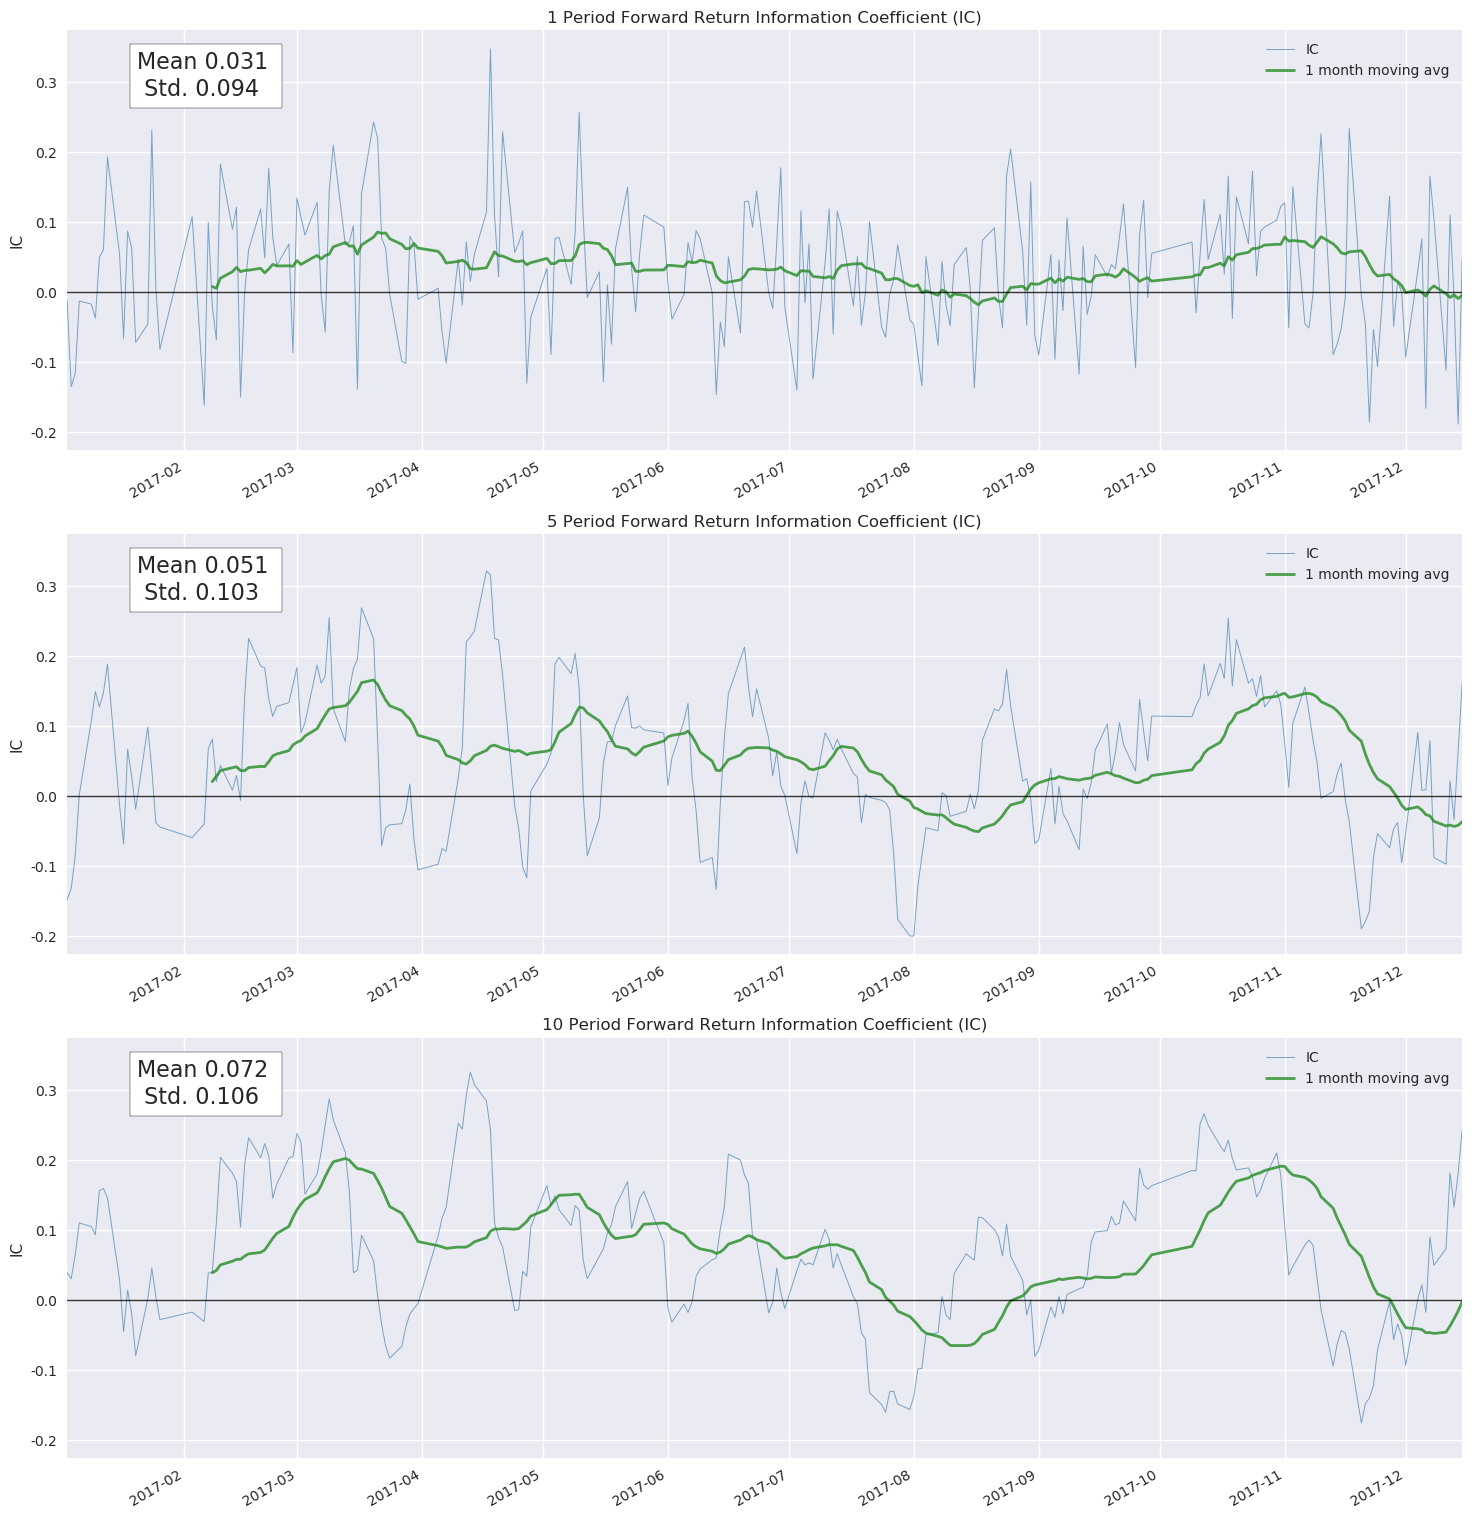

In [65]:
# 5、IC结果分析（0170101~20180101）
# 时间序列和移动平均图
plotting.plot_ic_ts(IC)

/opt/conda/envs/ricequant/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d0ea0c18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a5561cc0>], dtype=object)

/opt/conda/envs/ricequant/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


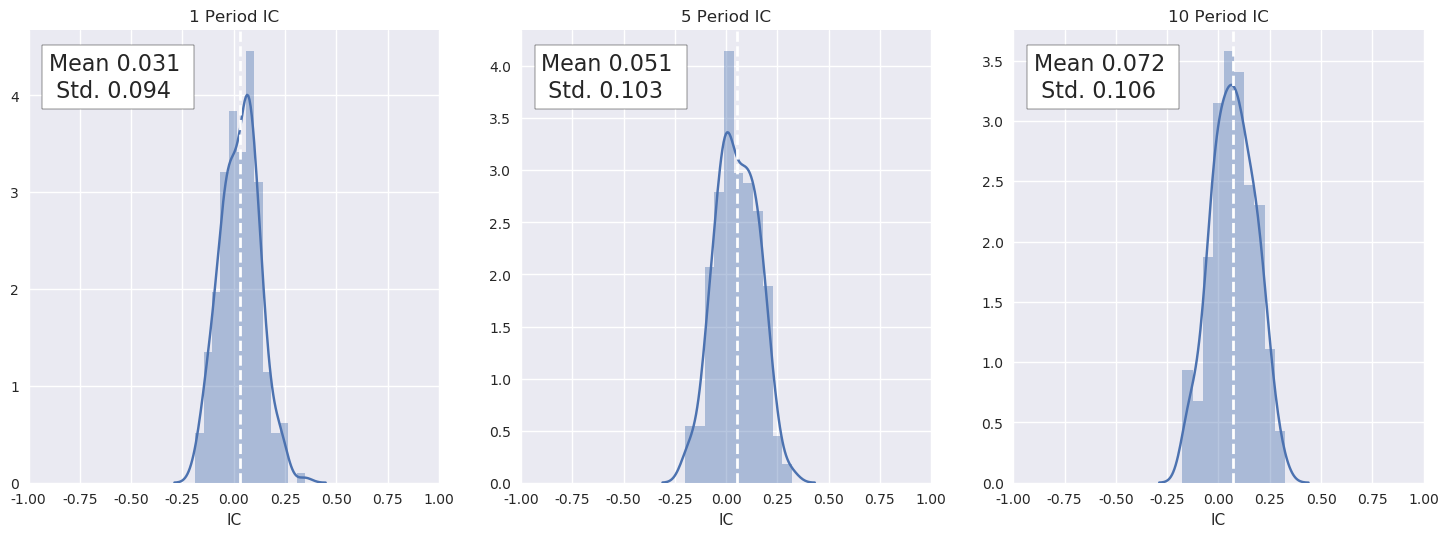

In [66]:
# 因子IC的分布图
plotting.plot_ic_hist(IC)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d0dfc940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1cbf0aa90>], dtype=object)

/opt/conda/envs/ricequant/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


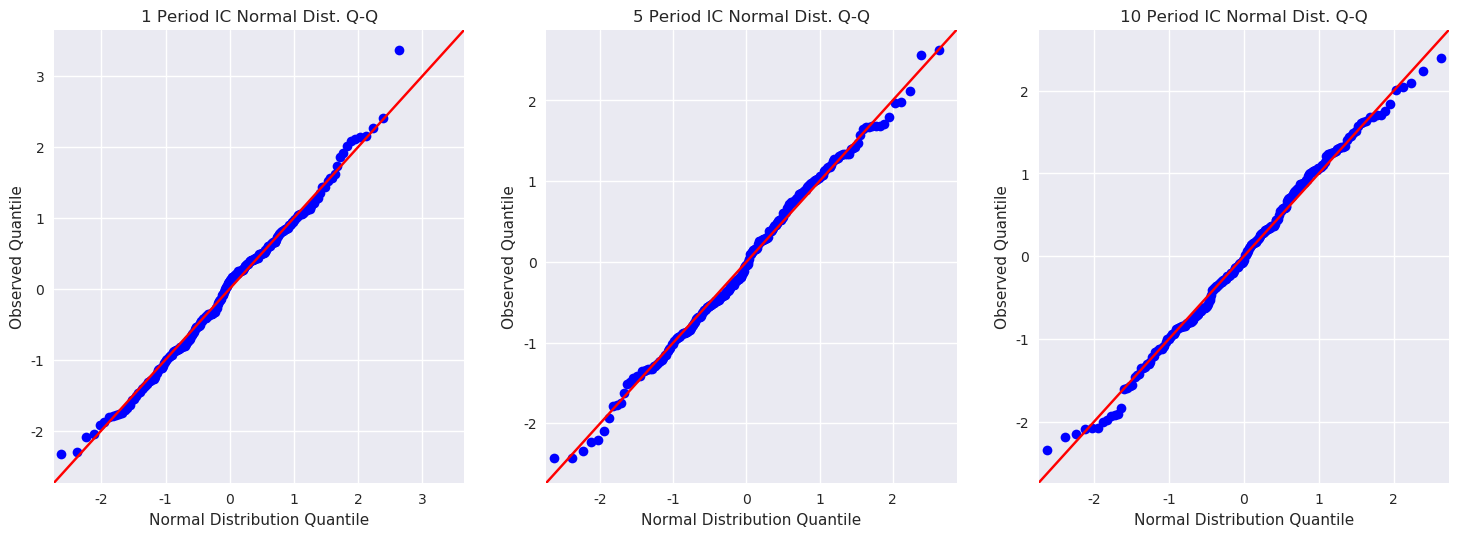

In [67]:
plotting.plot_ic_qq(IC)

In [68]:
# 得出IC > 0.02的比例
a = IC.iloc[:, 0]

len(a[a > 0.02])/len(a)

0.5512820512820513

In [69]:
0.031/0.094

0.32978723404255317

# 利用alphalens进行因子收益率 分析

Returns Analysis


,1,5,10
Ann. alpha,0.309,0.284,0.255
beta,-0.025,-0.053,-0.015
Mean Period Wise Return Top Quantile (bps),14.778,68.649,121.259
Mean Period Wise Return Bottom Quantile (bps),-9.059,-42.141,-77.762
Mean Period Wise Spread (bps),24.103,22.380,20.058


/opt/conda/envs/ricequant/lib/python3.5/site-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/opt/conda/envs/ricequant/lib/python3.5/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=5,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/opt/conda/envs/ricequant/lib/python3.5/site-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10,min_periods=1).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  min_periods=1, args=(period,))
/opt/c

<Figure size 800x550 with 0 Axes>

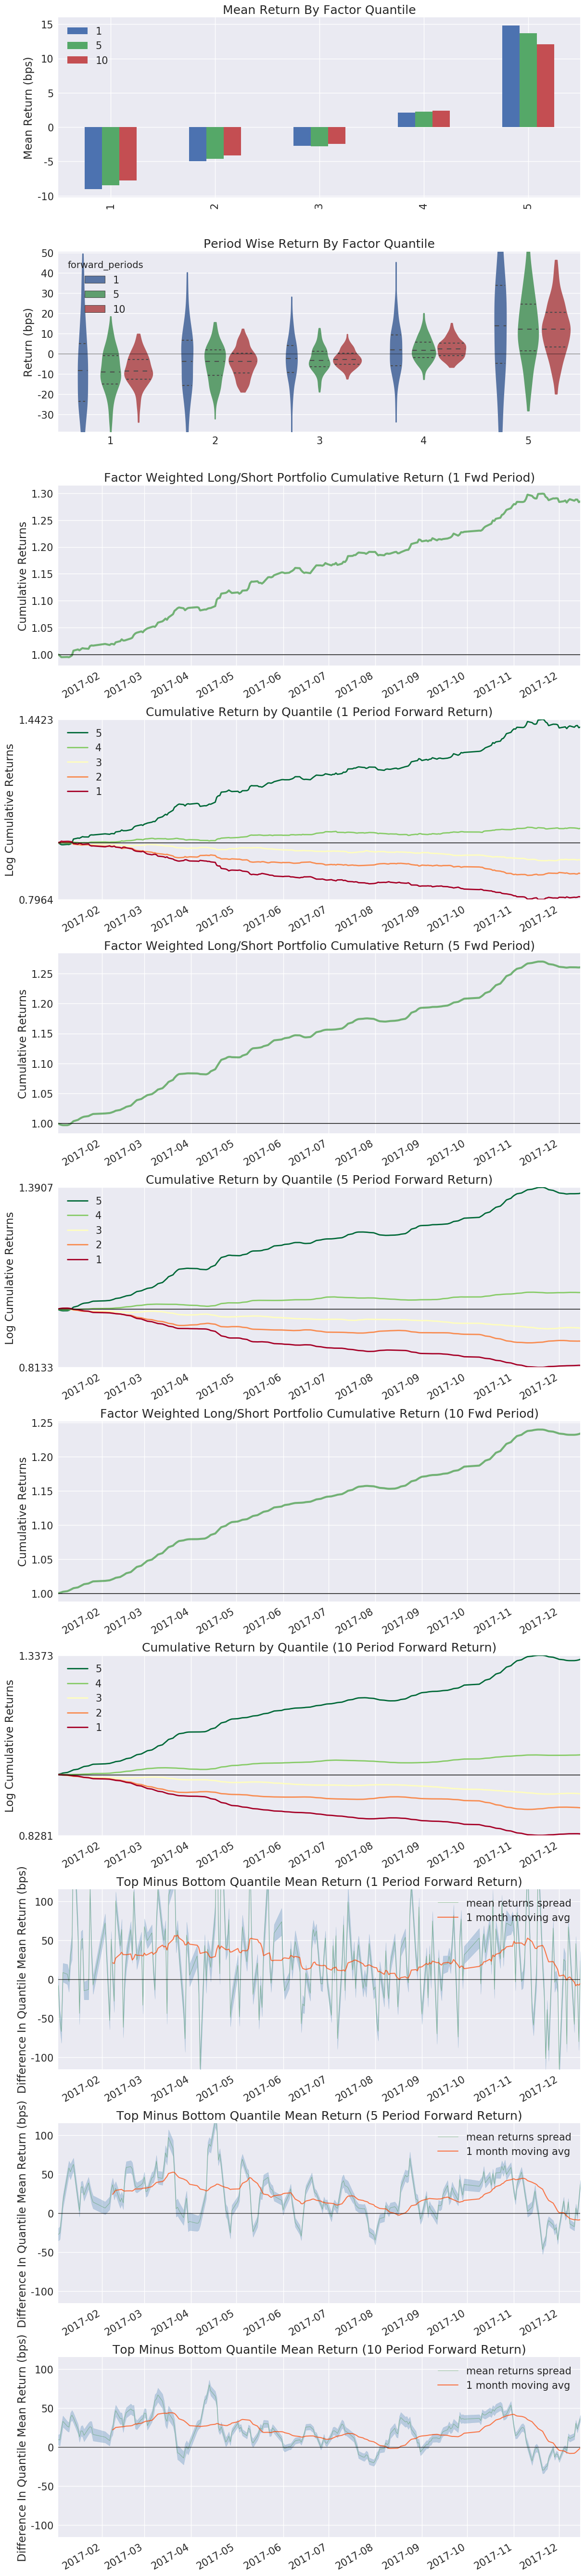

In [97]:
tears.create_returns_tear_sheet(factor_return)

In [99]:
performance.factor_returns(factor_return).iloc[:, 0].mean()

0.0010738953290106872

In [ ]:
# IC_basic_earnings_per_share
# IC_return_on_equity

In [137]:
st.spearmanr(IC_basic_earnings_per_share.iloc[:, 0], IC_return_on_equity.iloc[:, 0])

SpearmanrResult(correlation=0.98651053995771387, pvalue=2.4126052391000721e-184)

# 进行因子合成

In [139]:
# 对于因子的暴露度值进行合成
earn_return = pd.DataFrame()

In [141]:
for i in range(len(date)):
  
  # 取出两个因子数据
  q = query(fundamentals.income_statement.basic_earnings_per_share,
           fundamentals.financial_indicator.return_on_equity)
  
  fund = get_fundamentals(q, entry_date=date[i])[:, 0, :]
  
  earn_return = pd.concat([earn_return, fund])

In [144]:
earn_return['basic_earnings_per_share'] = earn_return['basic_earnings_per_share'].fillna(earn_return['basic_earnings_per_share'].mean())
earn_return['return_on_equity'] = earn_return['return_on_equity'].fillna(earn_return['return_on_equity'].mean())

In [142]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=1)

In [148]:
pca.fit_transform(earn_return[['basic_earnings_per_share', 'return_on_equity']])

array([[ -7.68077815],
       [ -9.47155362],
       [-19.26842622],
       ..., 
       [  1.56011194],
       [ -3.13902083],
       [ -4.03685699]])